<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammad Armin Dehghan

**Student ID**: 400101175





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


In [2]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)



**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [6]:
data = pd.read_csv('Logistic_question.csv')

data['Target'] = data['Target'].apply(lambda x: 1 if x > 0.5 else 0)

X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MyLogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9375
Precision: 0.9367088607594937
Recall: 1.0
F1 Score: 0.9673202614379085


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.



**Your answer:**

## Evaluation Metrics Explanation

1. **Accuracy:** Accuracy is the proportion of correctly classified instances among the total instances. It's a good overall measure of model performance when the classes in the dataset are balanced. However, accuracy may not be a reliable metric when the classes are imbalanced, as it can be misleading. For example, in a spam email classification task where the majority of emails are not spam, a high accuracy may be achieved by simply classifying all emails as not spam. Therefore, accuracy alone may not provide a complete picture of model performance, especially in imbalanced datasets.

2. **Precision:** Precision is the proportion of true positive predictions among all positive predictions made by the model. It indicates the model's ability to avoid false positives. Precision is particularly important in tasks where false positives are costly or undesirable. For example, in a medical diagnosis task where a false positive result could lead to unnecessary treatment or anxiety for the patient, high precision is crucial for ensuring the reliability of the model.

3. **Recall:** Recall, also known as sensitivity or true positive rate, is the proportion of true positive predictions among all actual positive instances in the dataset. It measures the model's ability to capture all positive instances. Recall is important in tasks where false negatives are costly or unacceptable. For instance, in a disease detection task, a false negative result could delay necessary treatment, so high recall is essential for ensuring that all positive cases are identified.

4. **F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when you want to consider both false positives and false negatives equally. The F1 score is suitable for tasks where you want to find a balance between minimizing false positives and false negatives. For example, in a text classification task where both precision and recall are important, such as sentiment analysis, the F1 score can help evaluate the overall performance of the model.

In summary, each evaluation metric provides unique insights into different aspects of model performance, and the choice of metric depends on the specific task requirements and the relative importance of minimizing false positives and false negatives.



**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [13]:
# Your code goes here!
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy_2 = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred)
recall_2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1 Score:", f1_2)

Accuracy: 0.9625
Precision: 0.9733333333333334
Recall: 0.9864864864864865
F1 Score: 0.9798657718120806


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
The results of using a built-in logistic regression function are overally better . The built-in function from scikit-learn is highly optimized and written in C, so it's likely to be faster, especially for large datasets.

## Parameters of Logistic Regression in Python

The Python built-in function for logistic regression typically refers to the implementation provided by libraries like scikit-learn. The main parameters of logistic regression in scikit-learn's `LogisticRegression` class are as follows:

1. **penalty:** This parameter specifies the type of regularization to apply. It can be set to "l1" for L1 regularization (lasso), "l2" for L2 regularization (ridge), or "none" for no regularization. Regularization helps prevent overfitting by penalizing large coefficients.

2. **C:** The inverse of regularization strength. A smaller value of C leads to stronger regularization, while a larger value reduces the amount of regularization. Tuning this parameter allows you to control the trade-off between fitting the training data well and keeping the model simple.

3. **solver:** This parameter specifies the optimization algorithm to use. Different solvers are available for logistic regression, including "liblinear" for small datasets, "lbfgs" for multiclass problems, "newton-cg" for multinomial logistic regression, and "sag" and "saga" for large datasets. The choice of solver can affect the convergence speed and performance of the model.

4. **max_iter:** The maximum number of iterations for the optimization algorithm to converge. If the algorithm does not converge within the specified number of iterations, it stops and returns the current solution. Increasing this parameter may improve convergence but also increase computation time.

5. **class_weight:** This parameter allows you to specify weights for different classes in the dataset. It is useful for handling imbalanced datasets by giving more importance to minority classes. Options include "balanced" to automatically adjust weights inversely proportional to class frequencies or a custom dictionary specifying class weights.

These parameters affect the logistic regression model's performance in the following ways:

- **Regularization (penalty and C):** By controlling the regularization strength and type, you can prevent overfitting and improve the model's generalization performance.
- **Optimization algorithm (solver and max_iter):** The choice of optimization algorithm and the maximum number of iterations can affect the convergence speed and stability of the model. Choosing an appropriate solver and increasing the maximum number of iterations if needed can help ensure that the algorithm converges to a good solution.
- **Class weights:** Adjusting class weights allows you to handle imbalanced datasets and give more importance to minority classes, which can improve the model's ability to correctly classify rare instances.

Overall, tuning these parameters carefully based on the characteristics of the dataset and the desired model behavior is crucial for achieving optimal performance with logistic regression.


# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [15]:
class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.num_classes = None

    def softmax(self, z):
        exp_scores = np.exp(z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def fit(self, X, y):
        m, n = X.shape
        self.num_classes = len(np.unique(y))
        self.weights = np.zeros((n, self.num_classes))
        self.bias = np.zeros(self.num_classes)

        for epoch in range(self.epochs):
        
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(linear_model)

            error = y_pred - np.eye(self.num_classes)[y]
            dw = (1 / m) * np.dot(X.T, error)
            db = (1 / m) * np.sum(error, axis=0)

            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.softmax(linear_model)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [22]:
# Your code goes here!
data = pd.read_csv('Logistic_question.csv')
for num_levels in range(2, 11):
    data[f'Target_{num_levels}'] = pd.qcut(data['Target'], num_levels, labels=False)
    X = data.drop(['Target', f'Target_{num_levels}'], axis=1).values
    y = data[f'Target_{num_levels}'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = MyMultinomialLogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy_3 = accuracy_score(y_test, y_pred)
    precision_3 = precision_score(y_test, y_pred, average='weighted' , zero_division='warn' )
    recall_3 = recall_score(y_test, y_pred, average='weighted')
    f1_3 = f1_score(y_test, y_pred, average='weighted')

    print(f"Quantization Levels: {num_levels}")
    print(f"Accuracy: {accuracy_3:.4f}")
    print(f"Precision: {precision_3:.4f}")
    print(f"Recall: {recall_3:.4f}")
    print(f"F1-score: {f1_3:.4f}")
    print()

Quantization Levels: 2
Accuracy: 0.9500
Precision: 0.9513
Recall: 0.9500
F1-score: 0.9501

Quantization Levels: 3
Accuracy: 0.7500
Precision: 0.8155
Recall: 0.7500
F1-score: 0.6648

Quantization Levels: 4
Accuracy: 0.7625
Precision: 0.8290
Recall: 0.7625
F1-score: 0.7230

Quantization Levels: 5
Accuracy: 0.4875
Precision: 0.3193
Recall: 0.4875
F1-score: 0.3711

Quantization Levels: 6
Accuracy: 0.4875
Precision: 0.4701
Recall: 0.4875
F1-score: 0.3811

Quantization Levels: 7
Accuracy: 0.3875
Precision: 0.2194
Recall: 0.3875
F1-score: 0.2359

Quantization Levels: 8
Accuracy: 0.3750
Precision: 0.4598
Recall: 0.3750
F1-score: 0.2593

Quantization Levels: 9
Accuracy: 0.3000
Precision: 0.1063
Recall: 0.3000
F1-score: 0.1569

Quantization Levels: 10
Accuracy: 0.2750
Precision: 0.2162
Recall: 0.2750
F1-score: 0.1642



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:** The best result is for i = 2

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**loading the dataset directly :**

In [2]:
adult_df = pd.read_csv('adult.csv', na_values='?')

**Task:** Determine the number of null entries!

In [3]:
null_count = adult_df.isnull().sum().sum()
print("Number of null entries represented by '?':", null_count)


Number of null entries represented by '?': 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

### Methods to Handle Missing Data:
1. **Removal of Rows or Columns**: One simple approach is to remove rows or columns with null entries. If a significant portion of the data is missing, removing the entire row or column may be a viable option. However, this method may result in loss of valuable information, especially if the missing data is not random.

2. **Imputation**: Imputation involves replacing missing values with estimated or calculated values. This can be done using various statistical methods such as mean, median, mode imputation, or more advanced techniques like regression imputation or k-nearest neighbors (KNN) imputation. Imputation helps retain the data structure and reduces the impact of missing values on the analysis.

3. **Prediction Models**: Another approach is to use prediction models to estimate missing values based on the available data. This can be achieved by training a machine learning model on the non-missing data and using it to predict the missing values. However, this method may be computationally expensive and requires a sufficiently large dataset.

4. **Indicator Variables**: Instead of imputing missing values directly, indicator variables can be created to indicate whether a value is missing or not. This approach allows the missingness to be included as a feature in the analysis, potentially capturing valuable information about the data.

5. **Advanced Imputation Techniques**: There are more sophisticated imputation techniques available, such as multiple imputation or matrix completion methods. Multiple imputation involves generating multiple plausible values for each missing entry, while matrix completion methods aim to fill in missing entries by leveraging the underlying structure of the data.

### Decision on Method Selection:
The choice of method depends on various factors including the nature of the data, the amount of missing data, the analysis objectives, and domain knowledge. For example:

- If the missing data is small and random, imputation methods like mean or median imputation may be suitable.
- If the missing data is significant but removing rows or columns would result in loss of valuable information, more sophisticated imputation techniques or prediction models may be preferred.
- If the missing data follows a particular pattern or is related to other variables, indicator variables or advanced imputation techniques may be appropriate.

In the case of the 'adult.csv' dataset, we would first need to assess the extent and pattern of missing data. Depending on the findings, we can then decide on the most suitable method(s) to handle the missing values. This might involve a combination of approaches or iterative refinement based on the specific characteristics of the dataset and the analysis requirements.

**Task:** Handle null entries using your best method.

In [4]:
# Your code goes here!
# we can use .dropna() 
adult_df = adult_df.dropna()

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [5]:
adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:

categorical_columns = adult_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)


Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [8]:
df_encoded = pd.get_dummies(adult_df)

label_encoder = LabelEncoder()


for col in categorical_columns:  
    adult_df[col] = label_encoder.fit_transform(adult_df[col])
adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [37]:

X = adult_df.drop(columns=['income'])
y = adult_df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


logistic_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(logistic_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X_train_scaled, y_train)

train_predictions = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Best Parameters:", best_params)
print("Best Train Accuracy:", train_accuracy)
print("Best Test Accuracy:", test_accuracy)

Best Parameters: {'C': 0.1}
Best Train Accuracy: 0.8206871769356221
Best Test Accuracy: 0.8208955223880597


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [41]:
i = 10
X_train_parts = np.array_split(X_train_scaled, i)
y_train_parts = np.array_split(y_train, i)

models = []
for j in range(i):
    model = MyLogisticRegression(learning_rate=0.01, epochs=1000)
    model.fit(X_train_parts[j], y_train_parts[j])
    models.append(model)


def majority_voting(models, X):
    predictions = np.array([model.predict(X) for model in models])
    ensemble_predictions = np.mean(predictions, axis=0) >= 0.5
    return ensemble_predictions.astype(int)


def average_probabilities(models, X):
    probabilities = np.array([model.predict_proba(X) for model in models])
    average_prob = np.mean(probabilities, axis=0)
    ensemble_predictions = average_prob >= 0.5
    return ensemble_predictions.astype(int)


def weighted_average_probabilities(models, X):
    weights = [accuracy_score(y_train_parts[j], model.predict(X_train_parts[j])) for j, model in enumerate(models)]
    probabilities = np.array([model.predict_proba(X) for model in models])
    weighted_average_prob = np.average(probabilities, axis=0, weights=weights)
    ensemble_predictions = weighted_average_prob >= 0.5
    return ensemble_predictions.astype(int)


X_test_scaled = scaler.transform(X_test)
y_pred_majority_voting = majority_voting(models, X_test_scaled)
y_pred_average_probabilities = average_probabilities(models, X_test_scaled)
y_pred_weighted_average_probabilities = weighted_average_probabilities(models, X_test_scaled)


accuracy_majority_voting = accuracy_score(y_test, y_pred_majority_voting)
accuracy_average_probabilities = accuracy_score(y_test, y_pred_average_probabilities)
accuracy_weighted_average_probabilities = accuracy_score(y_test, y_pred_weighted_average_probabilities)

print("Test Accuracy (Majority Voting):", accuracy_majority_voting)
print("Test Accuracy (Average Probabilities):", accuracy_average_probabilities)
print("Test Accuracy (Weighted Average Probabilities):", accuracy_weighted_average_probabilities)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Test Accuracy (Majority Voting): 0.814262023217247
Test Accuracy (Average Probabilities): 0.8139303482587065
Test Accuracy (Weighted Average Probabilities): 0.8139303482587065


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

## Proposed Ensemble Methods

1. **Majority Voting:**
   - **Method Explanation:** In the majority voting method, the final prediction is determined by the majority decision of multiple base models. Each base model makes its own prediction, and the final prediction is the class that receives the most votes among all base models.
   - **Reason for Use:** Majority voting is a simple yet effective ensemble method that can improve predictive performance by combining the predictions of multiple models. It works well when the base models are diverse and make uncorrelated errors. By aggregating multiple predictions, it can often reduce the variance and increase the overall accuracy of the ensemble model.

2. **Average Probabilities:**
   - **Method Explanation:** In the average probabilities method, the final prediction is obtained by averaging the predicted probabilities from multiple base models. For binary classification, this means averaging the predicted probabilities of belonging to the positive class (class 1).
   - **Reason for Use:** Averaging probabilities can provide a more nuanced prediction than simple majority voting, especially when the base models are well-calibrated and provide meaningful probabilities. It helps to smooth out the predictions and can be particularly useful when the decision threshold for classification is not critical, or when there is uncertainty about the optimal threshold.

3. **Weighted Average Probabilities:**
   - **Method Explanation:** Similar to average probabilities, in the weighted average probabilities method, the final prediction is obtained by averaging the predicted probabilities from multiple base models. However, each base model's contribution to the average is weighted according to its performance or reliability.
   - **Reason for Use:** Weighted averaging allows you to give more importance to base models that are more accurate or have higher confidence in their predictions. This can be beneficial when some base models are more reliable or have better performance than others. By assigning appropriate weights, you can potentially improve the overall predictive performance of the ensemble model.

Overall, these ensemble methods are chosen for their simplicity, effectiveness, and ability to leverage the strengths of multiple base models to improve predictive performance. The choice between these methods may depend on factors such as the characteristics of the base models, the nature of the problem, and the desired balance between simplicity and performance.


**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

For i=2: Train Accuracy: 0.8118694197971087, Test Accuracy: 0.8131564400221116
For i=3: Train Accuracy: 0.8122840478757222, Test Accuracy: 0.814262023217247
For i=4: Train Accuracy: 0.8119247035409238, Test Accuracy: 0.8129353233830846
For i=5: Train Accuracy: 0.8123393316195373, Test Accuracy: 0.8132669983416252
For i=6: Train Accuracy: 0.8118970616690162, Test Accuracy: 0.8134881149806523
For i=7: Train Accuracy: 0.8126433922105205, Test Accuracy: 0.8149253731343283
For i=8: Train Accuracy: 0.8122011222599994, Test Accuracy: 0.8134881149806523
For i=9: Train Accuracy: 0.8123946153633524, Test Accuracy: 0.8133775566611388
For i=10: Train Accuracy: 0.8124775409790751, Test Accuracy: 0.814262023217247
For i=11: Train Accuracy: 0.8117864941813859, Test Accuracy: 0.8144831398562742
For i=12: Train Accuracy: 0.8121181966442768, Test Accuracy: 0.812824765063571
For i=13: Train Accuracy: 0.8125881084667054, Test Accuracy: 0.81404090657822
For i=14: Train Accuracy: 0.8128368853138734, Test Ac

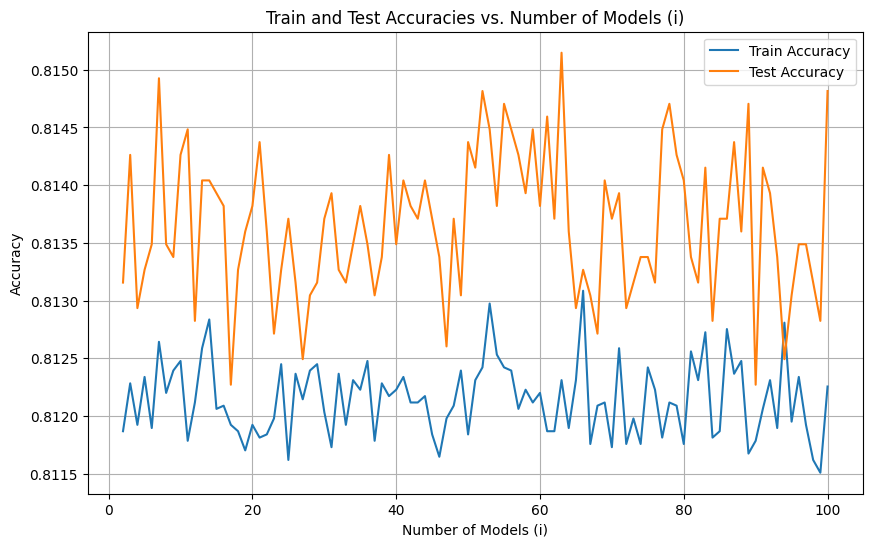

In [47]:
train_accuracies = []
test_accuracies = []
for i in range(2, 101):
    
    X_train_parts = np.array_split(X_train_scaled, i)
    y_train_parts = np.array_split(y_train, i)

    models = []
    for j in range(i):
        model = MyLogisticRegression(learning_rate=0.01, epochs=1000)
        model.fit(X_train_parts[j], y_train_parts[j])
        models.append(model)

    y_train_pred = majority_voting(models, X_train_scaled)
    y_test_pred = majority_voting(models, X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"For i={i}: Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")


plt.figure(figsize=(10, 6))
plt.plot(range(2, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(2, 101), test_accuracies, label='Test Accuracy')
plt.title('Train and Test Accuracies vs. Number of Models (i)')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


**Question:** Analyze the results.

**Your Answer:**

## Effects of Adding More Models to Ensemble Methods

1. **Improved Generalization:**
   - As you add more diverse base models to the ensemble, it often leads to improved generalization performance. Each base model may capture different aspects of the data and make different errors. By combining their predictions, the ensemble can effectively smooth out individual errors and make more accurate predictions on unseen data.

2. **Reduced Variance:**
   - Ensemble methods work by averaging or combining the predictions of multiple models. As you add more models to the ensemble, the variance of the ensemble typically decreases. This is because the individual errors of each model tend to cancel out when averaged over many predictions, resulting in a more stable and reliable prediction.

3. **Increased Complexity:**
   - Adding more models to the ensemble increases the complexity of the overall system. This can lead to longer training times and increased computational resources required for prediction. Additionally, a more complex ensemble may be harder to interpret and debug, especially if there are many different types of base models with different hyperparameters.

4. **Diminishing Returns:**
   - While adding more models to the ensemble initially improves performance, there is a point of diminishing returns where the marginal benefit of adding additional models decreases. After a certain point, the improvement in performance becomes marginal, and the computational cost of adding more models may outweigh the benefits.

5. **Overfitting Risk:**
   - Adding more models to the ensemble increases the risk of overfitting, especially if the base models are highly complex or if there is noise in the training data. It's important to monitor the performance of the ensemble on a separate validation set and potentially use techniques like early stopping or regularization to prevent overfitting.

Overall, adding more models to ensemble methods can lead to improved generalization, reduced variance, and more robust predictions. However, it's essential to balance the benefits of adding more models with the increased complexity and computational costs, as well as the risk of overfitting. Experimentation and validation on separate datasets are crucial for determining the optimal size and composition of the ensemble.
